In [1]:
#
# Mainly for analyzing ensemble-averaged MSD for separeted vege files
#

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from os import listdir
import pickle
#from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy.stats import brunnermunzel, linregress
from sklearn.linear_model import LinearRegression

In [2]:
dir_save = 'summary_results'
print(dir_save)
os.makedirs(dir_save, exist_ok=True)

summary_results


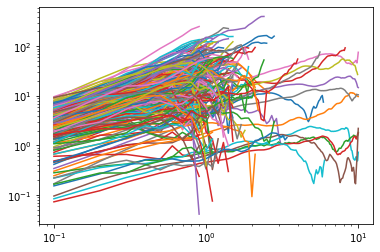

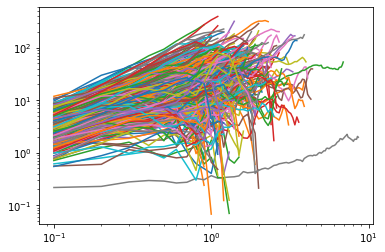

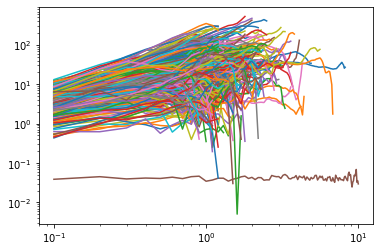

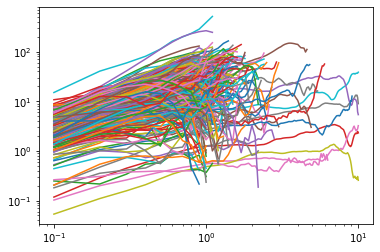

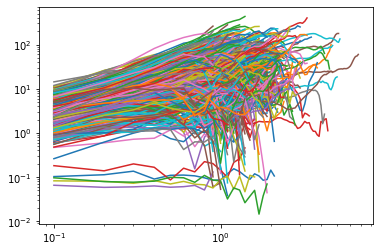

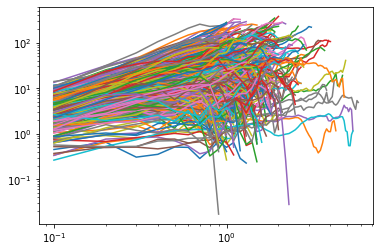

In [5]:
strain = ['SK445_2', 'SK570_2', 'SK571_2', 'SK575_2', 'SK577_2', 'SK612_4']
msds_strain = []
for i in strain:
    file_id = i
    #df = pd.read_csv(os.path.join('data', file_id + '.csv'))
    dir_read = 'results_' + file_id
    dir_read = dir_read.replace('-', '_')
    with open (os.path.join(dir_read, 'msds'), 'rb') as fp:
        msds = pickle.load(fp)
        msds_strain.append(msds)

for msds in msds_strain:
    fig, ax = plt.subplots()
    for msd in msds:
        ts = 0.1 * np.arange(msd.shape[0])
        plt.loglog(ts[1:], msd[1:])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


LinregressResult(slope=0.9522345362903469, intercept=3.4264642951269453, rvalue=0.9995998465605189, pvalue=1.1211809691718861e-13, stderr=0.009527031011514009)
LinregressResult(slope=0.9317616963142316, intercept=3.5350668960114437, rvalue=0.9986903964088671, pvalue=1.2848570692571306e-11, stderr=0.01687608396470567)
LinregressResult(slope=0.9484684058667218, intercept=3.661101474802423, rvalue=0.9994729781834406, pvalue=3.3730109110821733e-13, stderr=0.01089127903315144)
LinregressResult(slope=0.9027439609687984, intercept=3.379388016299401, rvalue=0.998055201772726, pvalue=6.243992281429959e-11, stderr=0.019934532362449423)
LinregressResult(slope=0.9450097804267135, intercept=3.4791565330488523, rvalue=0.9997411199131321, pvalue=1.9644352446549055e-14, stderr=0.0076039624898081295)
LinregressResult(slope=0.9567136785749747, intercept=3.680104458183409, rvalue=0.9992870052426778, pvalue=1.1296704668386773e-12, stderr=0.012779901007081634)
Diffusion time exponents:  [0.9522345362903469

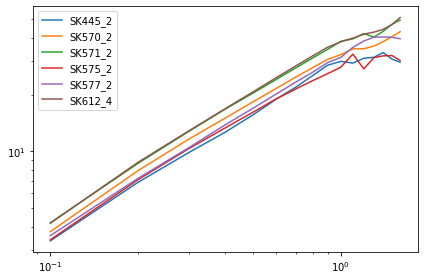

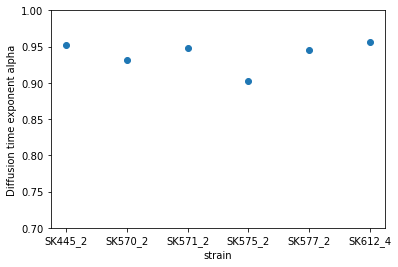

In [9]:
#
# Ensemble-averaged MSDs during germination
#
ens_msds_strain = []
for i, msds in zip(strain, msds_strain):
    df_msds = pd.DataFrame(msds)
    #print(df_msds)
    ens_msd = df_msds.mean(0, skipna=True).values
    ens_msds_strain.append(ens_msd)
    #print(ens_msd)
    np.savetxt(os.path.join(dir_save, 'ens_msd_' + str(i) + '.txt'), ens_msd)

alphas = []
fig, ax = plt.subplots()
ts = 0.1 * np.arange(ens_msds_strain[0].shape[0])
for i, ens_msd in zip(strain, ens_msds_strain):
    label = str(i)
    plt.loglog(ts[1:17], ens_msd[1:17], label=label)
    res = linregress(np.log(ts[1:11]), np.log(ens_msd[1:11]))
    print(res)
    alphas.append(res.slope)

plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'ens_msd_strain.eps'))

print('Diffusion time exponents: ', alphas)
np.savetxt(os.path.join(dir_save, 'alphas.txt'), alphas)

fig, ax = plt.subplots()
plt.scatter(strain, alphas)
plt.ylim(0.7,1.0)
plt.xlabel('strain')
plt.ylabel('Diffusion time exponent alpha')
plt.savefig(os.path.join(dir_save, 'alpha_strain.eps'))
plt.savefig(os.path.join(dir_save, 'alpha_strain.png'))
